<a href="https://colab.research.google.com/github/WendelLuanEC/Neural-Network/blob/master/RedeNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificador

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 

In [3]:
(imagens_treinamento, labels_treinamento), (imagens_teste, labels_teste) = datasets.cifar10.load_data()
imagens_teste = imagens_teste/255
imagens_treinamento = imagens_treinamento/255

170498071/170498071 [==============================] - 14s 0us/step


In [1]:
name_classes = ['avião', 'automovel', 'passaro', 'gato', 'cervo', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagens_treinamento[i])
  plt.xlabel(name_classes[labels_treinamento[i][0]])
plt.show()

NameError: ignored

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(32,32,3)))
cnn.add(layers.MaxPool2D((2,2)))
cnn.add(layers.Conv2D(64,(3,3), activation = 'relu'))
cnn.add(layers.MaxPool2D((2,2)))
cnn.add(layers.Conv2D(64,(3,3), activation = 'relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(10))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
cnn.compile(optimizer = "Adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
historico = cnn.fit(imagens_treinamento, labels_treinamento, epochs = 10, validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5159 - accuracy: 0.4449 - val_loss: 1.3323 - val_accuracy: 0.5193
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1514 - accuracy: 0.5951 - val_loss: 1.0805 - val_accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9956 - accuracy: 0.6501 - val_loss: 0.9722 - val_accuracy: 0.6534
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9000 - accuracy: 0.6820 - val_loss: 0.9451 - val_accuracy: 0.6665
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8238 - accuracy: 0.7090 - val_loss: 0.9267 - val_accuracy: 0.6764
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7617 - accuracy: 0.7327 - val_loss: 0.8528 - val_accuracy: 0.7040
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7094 - accuracy: 0.7505 - val_loss: 0.9019 - val_accuracy

(0.0, 1.0)

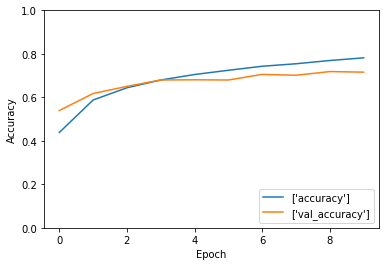

In [ ]:
plt.plot(historico.history['accuracy'], label = ['accuracy'])
plt.plot(historico.history['val_accuracy'], label = ['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0,1])
